In [3]:
__author__ = "@Tssp"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18

In [4]:
# Parameters and Constants:
delta, asc = np.loadtxt('Simulations/delta_asc_5505.txt')
delta = delta.tolist()
delta[-3] = Decimal('0.7100')
asc = asc.tolist()
mass = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
kx = 2*np.pi/lambd
Iy = 4993 * (1e4 / Eh * to * ao**2)
Vy = alpha * Iy # a.u
Iy = Vy/alpha
wy = np.sqrt( 2 * Vy * kx**2 / mass)       
dho = np.sqrt(2 / (mass * wy))
x = dho / asc
print('wy [u.a]: ', wy/to)
print('dy [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dy [u.a]:  1737.6709708894564


In [5]:
np.sqrt(5505/4993)

1.0500207431214774

In [6]:
print(os.getcwd())
folder_path = "Simulations/q1d/ix5505_iy4993_iz50/"

/Users/tomy/PhD/Ultracold_Atoms_src


In [7]:
Data = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_b_x20000_y20000_z20000_152rm8g2l50m10_102CM8g1L50M10_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix5505_iy4993_iz50_LiLi_a3Sup_{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_500-800_75b.eva'))
    except:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_b_x20000_y20000_z20000_152rm8g2l50m10_102CM8g1L50M10_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix5505_iy4993_iz50_LiLi_a3Sup_{d}0_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_500-800_75b.eva'))

In [8]:
dic = transpose_energies(Data)

In [9]:
dic, least_bound_pos = dic_from_least_bound_forward(dic, wy)

Least bound state:  1050 -0.014743248063566352
First trap state:  1051 0.12385152932470908


In [10]:
%matplotlib inline

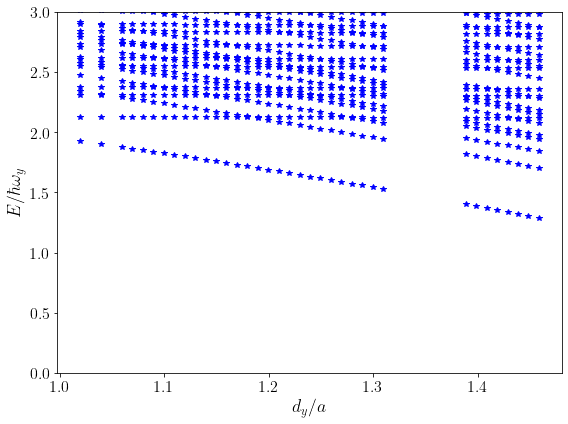

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos+5, least_bound_pos + 30):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b*')
ax.set_ylim(0, 3)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
fig.savefig('PRL_Sala_Results/Figures/Ix5505_Iy4993_Iz50_Easc.png', dpi=200)
plt.show()

# Crosses

1056
1057
1058
1059
1060


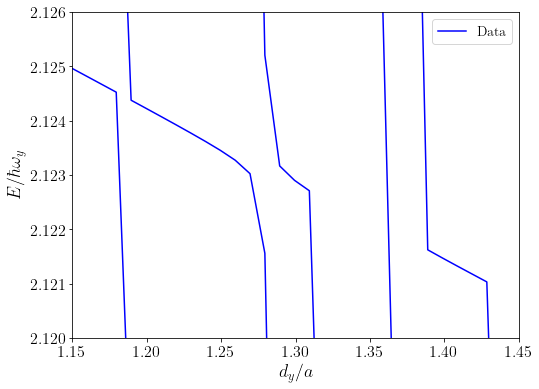

In [16]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos + 6, least_bound_pos + 11):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(2.12, 2.126)
ax2.set_xlim(1.15, 1.45)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.show()

In [17]:
%matplotlib

Using matplotlib backend: MacOSX


In [18]:
fig2, ax2 = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos + 6, least_bound_pos + 11):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(2.12, 2.126)
ax2.set_xlim(1.15, 1.45)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 40:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

xcoord: [1.150433317284545, 1.1527443428021185, 1.1540442946557534, 1.1562108810784786, 1.158521906596052, 1.1614106884930187, 1.1640105922002888, 1.167043813192104, 1.1719547424169474, 1.1736880115551276, 1.175565719788156, 1.1778767453057293, 1.1904429465575348, 1.1931872893596533, 1.19694270582571, 1.2021425132402503, 1.2070534424650938, 1.210086663456909, 1.2160086663456908, 1.2196196437168993, 1.2226528647087145, 1.2255416466056812, 1.2292970630717381, 1.2326191622532499, 1.2353635050553682, 1.2389744824265767, 1.2414299470389984, 1.2438854116514202, 1.2467741935483871, 1.2508184882041404, 1.2551516610495907, 1.2593403948001924, 1.2925613866153105, 1.295739046701974, 1.2994944631680307, 1.3039720751083292, 1.3087385652383245, 1.3887578237843043, 1.392513240250361, 1.3969908521906595]
 ycoord: [2.1249319298518183, 2.1248969722864186, 2.1248853197646187, 2.124856188460119, 2.124827057155619, 2.1247746208075196, 2.12473383698122, 2.1246872268940202, 2.1246522693286205, 2.124605659241

In [19]:
%matplotlib inline

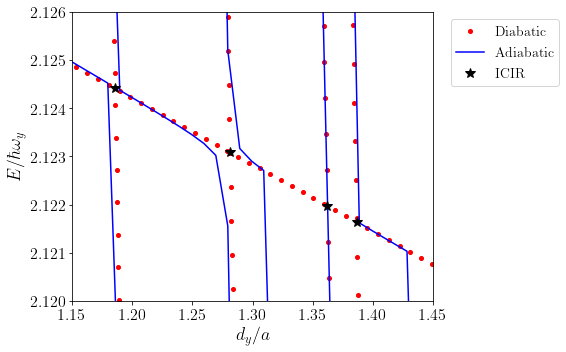

In [20]:
fig3, ax3 = plt.subplots(figsize=(8,5))
# nivel 1056:
f1056 = np.polyfit(xcoord, ycoord, deg=1)
x1056 = np.linspace(x[0], x[-1])
ax3.plot(x1056, np.polyval(f1056, x1056), 'ro', markersize=4, label='Diabatic')
ax3.plot(x, dic['nivel_1056']/wy, 'b', label='Adiabatic')

# nivel 1057:
f1057 = np.polyfit(x[(x > 1.04) & (x < 1.18)], np.array(dic['nivel_1057'])[(x > 1.04) & (x < 1.18)]/wy, deg=1)
x1057 = np.linspace(1.15, 1.2, num=100)
ax3.plot(x1057, np.polyval(f1057, x1057), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1057']/wy, 'b')

# nivel 1058:
f1058 = np.polyfit(x[(x > 1.14) & (x < 1.28)], np.array(dic['nivel_1058'])[(x > 1.14) & (x < 1.28)]/wy, deg=1)
x1058 = np.linspace(1.25, 1.3, num=100)
ax3.plot(x1058, np.polyval(f1058, x1058), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1058']/wy, 'b')

# nivel 1059:
f1059 = np.polyfit(x[(x > 1.25) & (x < 1.4)], np.array(dic['nivel_1059'])[(x > 1.25) & (x < 1.4)]/wy, deg=1)
x1059 = np.linspace(1.35, 1.38, num=50)
ax3.plot(x1059, np.polyval(f1059, x1059), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1059']/wy, 'b')

# nivel 1060:
f1060 = np.polyfit(x[(x > 1.25) & (x < 1.39)], np.array(dic['nivel_1060'])[(x > 1.25) & (x < 1.39)]/wy, deg=1)
x1060 = np.linspace(1.37, 1.4, num=50)
ax3.plot(x1060, np.polyval(f1060, x1060), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1060']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1056, f1057), np.polyval(f1056, cross_points(f1056, f1057)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1056, f1058), np.polyval(f1056, cross_points(f1056, f1058)), 'k*', markersize=10)
ax3.plot(cross_points(f1056, f1059), np.polyval(f1056, cross_points(f1056, f1059)), 'k*', markersize=10)
ax3.plot(cross_points(f1056, f1060), np.polyval(f1056, cross_points(f1056, f1060)), 'k*', markersize=10)

ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(2.12, 2.126)
ax3.set_xlim(1.15, 1.45)
plt.tight_layout()
fig3.savefig('PRL_Sala_Results/Figures/Ix5503_Iy4993_Iz50_Easc_Interpolation.png', dpi=200)

In [21]:
print(f'''Crosses between (x, E):
* 1056-1057: ({cross_points(f1056, f1057)}, {np.polyval(f1056, cross_points(f1056, f1057))})
* 1056-1058: ({cross_points(f1056, f1058)}, {np.polyval(f1056, cross_points(f1056, f1058))})
* 1056-1059: ({cross_points(f1056, f1059)}, {np.polyval(f1056, cross_points(f1056, f1059))})
* 1056-1060: ({cross_points(f1056, f1060)}, {np.polyval(f1056, cross_points(f1056, f1060))})''')

Crosses between (x, E):
* 1056-1057: (1.1855945020712877, 2.1244144285739233)
* 1056-1058: (1.2812998586626225, 2.123090591170402)
* 1056-1059: (1.3622480517694786, 2.1219708811604394)
* 1056-1060: (1.3865944587383947, 2.1216341112518915)


In [22]:
1/ 1.3865944587383947

0.7211914007718297

In [17]:
print(f"ICIR: asc/dy = {1/cross_points(f1056, f1058)} and {1/cross_points(f1056, f1059)}")

ICIR: asc/dy = 0.7804284076418225 and 0.73401877568123


In [18]:
np.savetxt('PRL_Sala_Results/ICIR_positions_5505_4993_50.txt', [[1.05, 1.05], [1/cross_points(f1056, f1058), 1/cross_points(f1056, f1059)], [np.polyval(f1056, cross_points(f1056, f1058)), np.polyval(f1056, cross_points(f1056, f1059))]], header='wx/wy, asc/dy, E/hwy')